In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set_palette("husl")

os.makedirs("figures", exist_ok=True)

In [3]:
def load_data():
    df = pd.read_csv("../../1_datasets/processed_data/afdr_cleaned.csv")
    return df

In [4]:
def overview_and_visualizations(df):
    # Overview: histograms for all numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4 * len(numeric_cols)))
    if len(numeric_cols) == 1:
        axes = [axes]
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
    plt.tight_layout()
    plt.savefig("figures/bnpl_numeric_distributions.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="RdYlBu_r", fmt=".2f", square=True)
    plt.title("Correlation Matrix of Numeric Features")
    plt.tight_layout()
    plt.savefig("figures/bnpl_correlation_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Boxplot of financial_stress_score by over_indebtedness_flag
    if (
        "financial_stress_score" in df.columns
        and "over_indebtedness_flag" in df.columns
    ):
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="over_indebtedness_flag", y="financial_stress_score", data=df)
        plt.title("Financial Stress Score by Over-Indebtedness")
        plt.xlabel("Over-Indebtedness Flag")
        plt.ylabel("Financial Stress Score")
        plt.tight_layout()
        plt.savefig("figures/financial_stress_by_indebtedness.png")
        plt.show()

    # Barplot of bnpl_usage_frequency by over_indebtedness_flag
    if "bnpl_usage_frequency" in df.columns and "over_indebtedness_flag" in df.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(
            x="over_indebtedness_flag", y="bnpl_usage_frequency", data=df, ci=None
        )
        plt.title("BNPL Usage Frequency by Over-Indebtedness")
        plt.xlabel("Over-Indebtedness Flag")
        plt.ylabel("BNPL Usage Frequency")
        plt.tight_layout()
        plt.savefig("figures/bnpl_usage_by_indebtedness.png")
        plt.show()

    return numeric_cols

In [5]:
def group_analysis(df):
    # Analyze by over_indebtedness_flag if present
    if "over_indebtedness_flag" in df.columns:
        group = df.groupby("over_indebtedness_flag").mean(numeric_only=True)
        print("\nMean values by Over-Indebtedness Flag:")
        print(group)
        group.plot(kind="bar", figsize=(12, 6))
        plt.title("Mean Numeric Features by Over-Indebtedness Flag")
        plt.tight_layout()
        plt.savefig("figures/mean_by_indebtedness_flag.png")
        plt.show()

In [6]:
def summary_statistics(df, numeric_cols):
    print("\n" + "=" * 60)
    print("📊 SUMMARY STATISTICS")
    print("=" * 60)
    print("\n📈 Summary statistics for numeric columns:")
    print(df[numeric_cols].describe())
    # Percentage breakdown for binary/categorical columns
    for col in df.columns:
        if df[col].nunique() <= 10 and df[col].dtype in [int, float]:
            print(f"\nPercentage breakdown for {col}:")
            print(df[col].value_counts(normalize=True) * 100)

In [7]:
def save_processed_data(df):
    df.to_csv("figures/afdr_explored.csv", index=False)
    print(
        "\n✅ Exploration complete! Processed data saved to 'figures/bnpl_explored.csv'"
    )
    print("📊 Visualizations saved as PNG files in the 'figures/' directory")

In [8]:
def main():
    df = load_data()
    numeric_cols = overview_and_visualizations(df)
    group_analysis(df)
    summary_statistics(df, numeric_cols)
    save_processed_data(df)

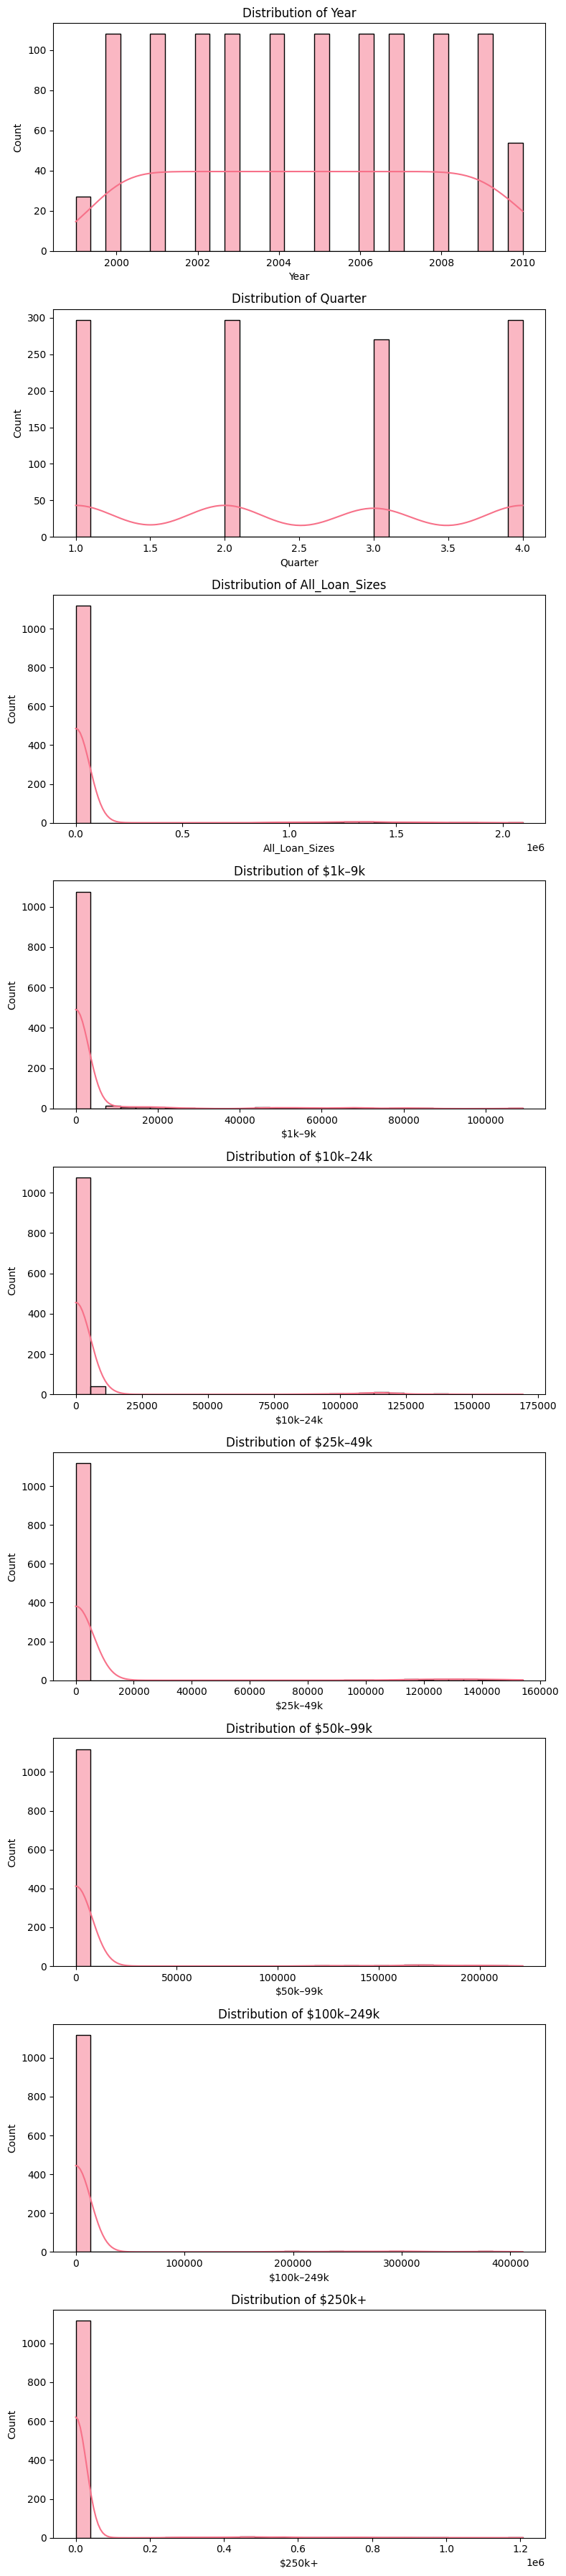

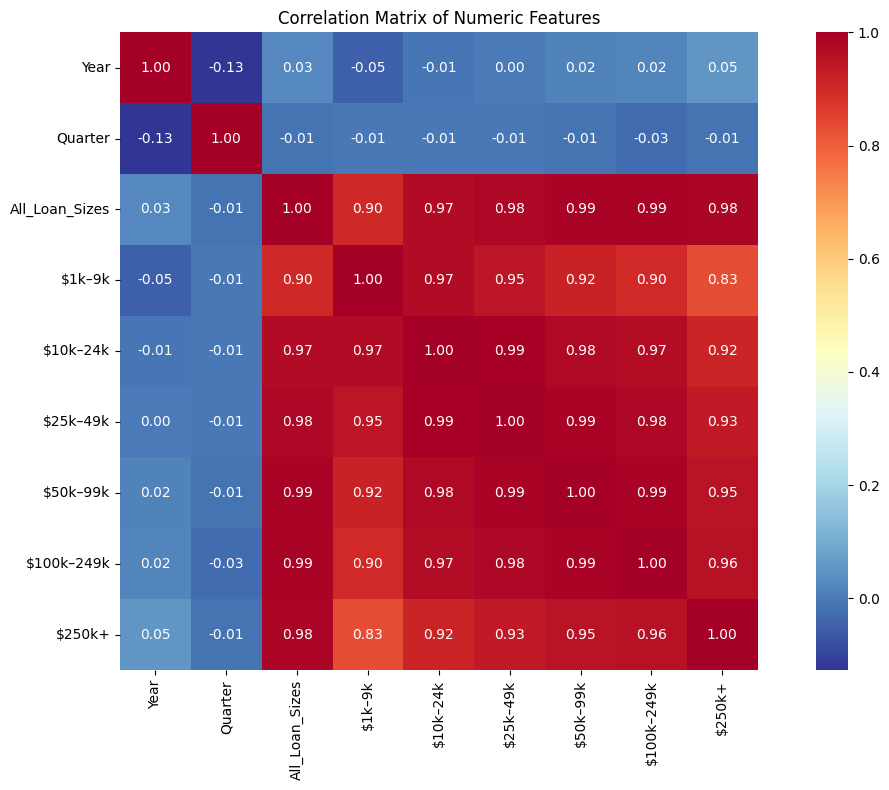


📊 SUMMARY STATISTICS

📈 Summary statistics for numeric columns:
              Year      Quarter  All_Loan_Sizes         $1k–9k       $10k–24k  \
count  1161.000000  1161.000000    1.161000e+03    1161.000000    1161.000000   
mean   2004.627907     2.488372    5.146690e+04    3011.984582    4587.541154   
std       3.126811     1.128813    2.615993e+05   13023.570880   22108.914265   
min    1999.000000     1.000000    0.000000e+00       0.000000       0.000000   
25%    2002.000000     1.000000    5.650000e+00       5.120000       5.950000   
50%    2005.000000     2.000000    8.420000e+00       7.750000       8.260000   
75%    2007.000000     4.000000    2.374000e+01      21.670000      21.010000   
max    2010.000000     4.000000    2.093048e+06  109035.000000  169336.000000   

            $25k–49k       $50k–99k     $100k–249k        $250k+  
count    1161.000000    1161.000000    1161.000000  1.159000e+03  
mean     4928.187778    6438.079328   10844.918544  2.177684e+04  
std 

In [9]:
if __name__ == "__main__":
    main()